In [1]:
# from : https://docs.opencv.org/3.4/d8/d83/tutorial_py_grabcut.html
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

In [4]:
# 1. get rectangle coordinates
image_path = "D:/rose lelf dataset/last.jpg"
image = Image.open(image_path)
image_orig = np.array(image)
image_orig = cv2.cvtColor(image_orig, cv2.COLOR_BGR2GRAY)

contours, _ = cv2.findContours(np.uint8(image_orig), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

best_rect = None
best_rect_area = 0

for contour in contours:
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box_area = rect[1][0] * rect[1][1]

    if box_area > best_rect_area:
        best_rect = box
        best_rect_area = box_area

min_x = int(min(best_rect[:,0]))
min_y = int(min(best_rect[:,1]))
max_x = int(max(best_rect[:,0]))
max_y = int(max(best_rect[:,1]))
w = max_x - min_x
h = max_y - min_y
x = min_x
y = min_y

rect = (x , y, w, h)

Text(0.5, 1.0, 'GrabCut output')

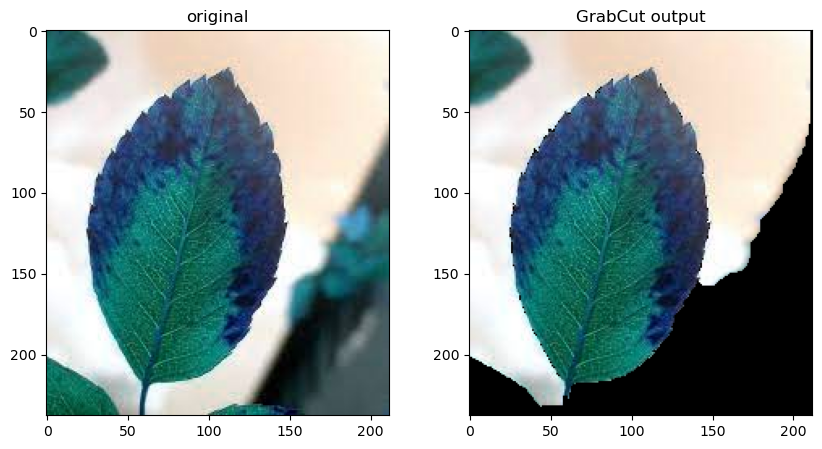

In [5]:
# 2. implement GrabCut

#grabcut needs image opened in cv2
img = cv2.imread(image_path)

mask = np.zeros(img.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# 6 is the iteration,
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,6,cv2.GC_INIT_WITH_RECT)


mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
result = img * mask[:, :, np.newaxis]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("original")
ax[1].imshow(result, cmap='gray')
ax[1].set_title("GrabCut output")

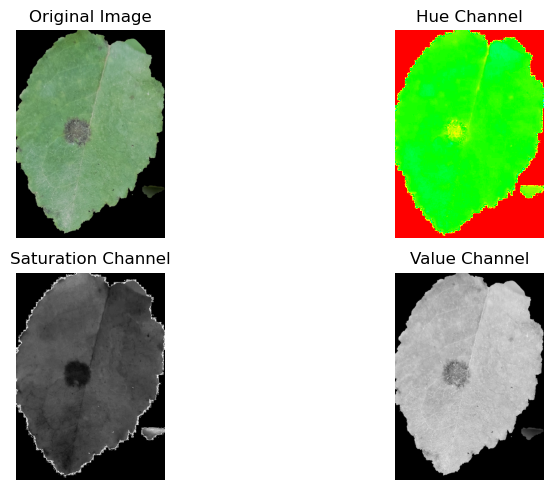

In [16]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('D:/rose lelf dataset/seg/black/Black Spot (25).jpg')  # Replace with your image path

# Convert BGR to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split channels
hue_channel, saturation_channel, value_channel = cv2.split(hsv_image)

# Display the original and individual HSV channels
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(hue_channel, cmap='hsv')
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(saturation_channel, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(value_channel, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()


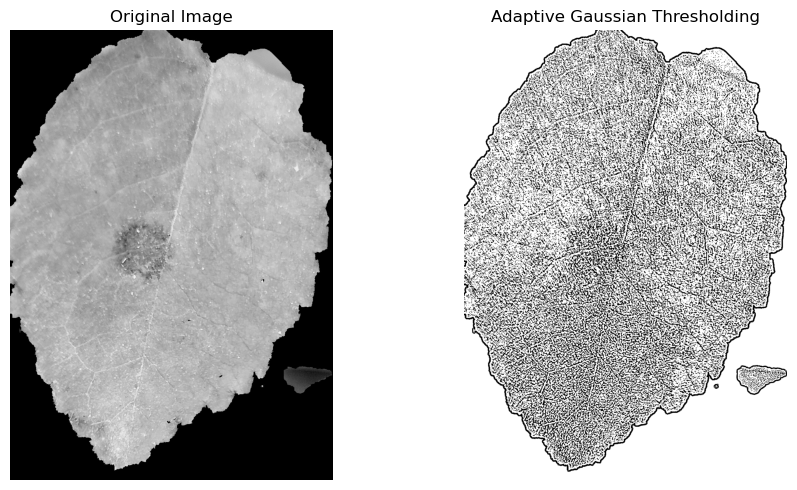

In [17]:
import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('D:/rose lelf dataset/seg/black/Black Spot (25).jpg', 0)  # Replace with your image path and convert to grayscale

# Apply Adaptive Gaussian Thresholding
# Parameters: src, maxValue, adaptiveMethod, thresholdType, blockSize, C (constant subtracted from the mean)
thresholded_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the original and thresholded images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Adaptive Gaussian Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()


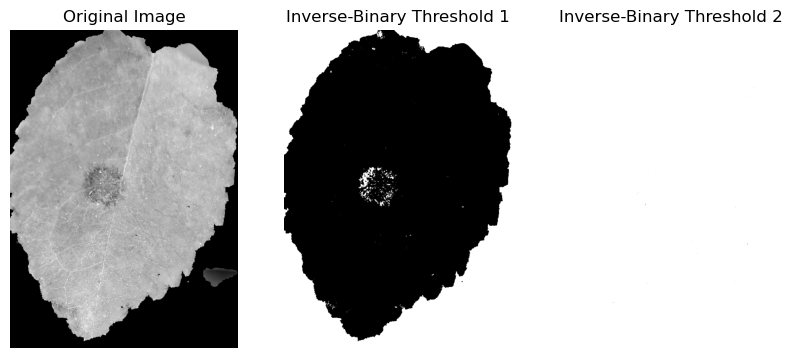

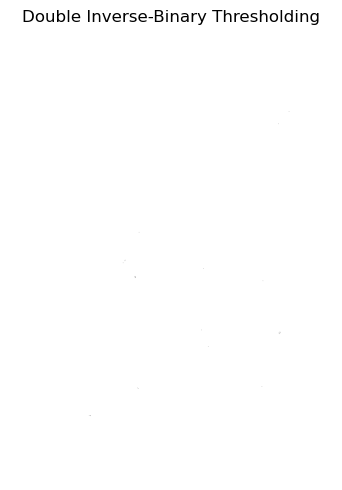

In [18]:
import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('D:/rose lelf dataset/seg/black/Black Spot (25).jpg', 0)  # Replace with your image path and convert to grayscale

# Apply inverse binary thresholding with two different thresholds
threshold_value_1 = 100
threshold_value_2 = 200

_, thresholded_image_1 = cv2.threshold(image, threshold_value_1, 255, cv2.THRESH_BINARY_INV)
_, thresholded_image_2 = cv2.threshold(image, threshold_value_2, 255, cv2.THRESH_BINARY_INV)

# Combine the thresholded images using bitwise OR operation
double_thresholded_image = cv2.bitwise_or(thresholded_image_1, thresholded_image_2)

# Display the original and double inverse-binary thresholded images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(thresholded_image_1, cmap='gray')
plt.title('Inverse-Binary Threshold 1')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(thresholded_image_2, cmap='gray')
plt.title('Inverse-Binary Threshold 2')
plt.axis('off')

plt.figure(figsize=(5, 5))
plt.imshow(double_thresholded_image, cmap='gray')
plt.title('Double Inverse-Binary Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()


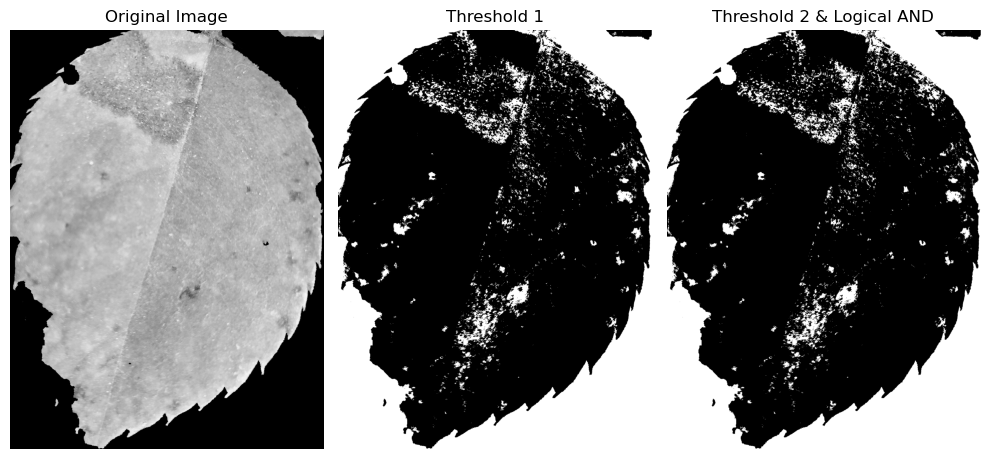

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image (replace 'image_path.jpg' with your image path)
image = cv2.imread('D:/rose lelf dataset/seg/black/Black Spot (35).jpg', cv2.IMREAD_GRAYSCALE)

# Apply double inverse-binary thresholding
_, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh2 = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)

# Perform logical AND operation between the two thresholded images
double_threshold = cv2.bitwise_and(thresh1, thresh2)

# Display the original image and the double inverse-binary thresholded image
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Threshold 1')
plt.imshow(thresh1, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Threshold 2 & Logical AND')
plt.imshow(double_threshold, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
